This notebook demonstrates the application of a decision tree to the Iris dataset (https://archive.ics.uci.edu/ml/datasets/iris).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

For the sake of illustration, we only consider two of the four features; classification trees can, of course, also be applied to data with more features.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

# select only two features
X = iris.data[:, :2]
y = iris.target

Let us fit a classification tree using the popular Scikit-Learn library!

In [3]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
model = DecisionTreeClassifier(max_depth=2)

# train the model
model.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=0)

Next, let us visualize the final classification surface/boundaries. Since we are only considering two features, we can generate a two-dimensional plot (see http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html).

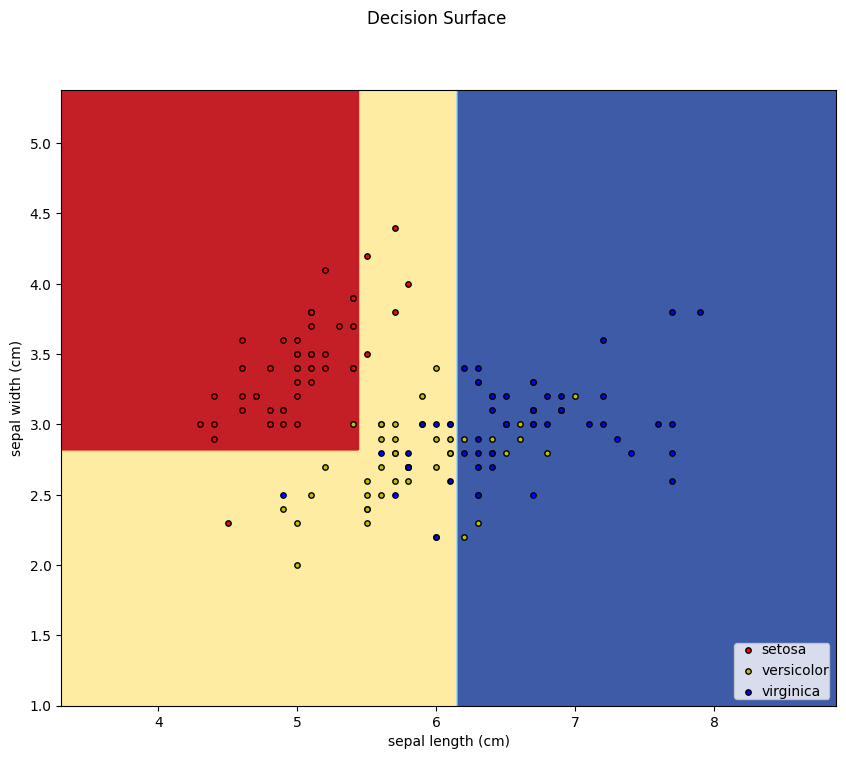

In [4]:
import numpy

plot_step = 0.02
n_classes = 3
plot_colors = "ryb"

plt.figure(figsize=(10,8))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, plot_step),
                     numpy.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = model.predict(numpy.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = numpy.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                edgecolor='black', s=15)
plt.suptitle("Decision Surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()    

Next, let us visualize the induced tree structure (note: in order to execute this cell, you need to install the 'graphviz' package).

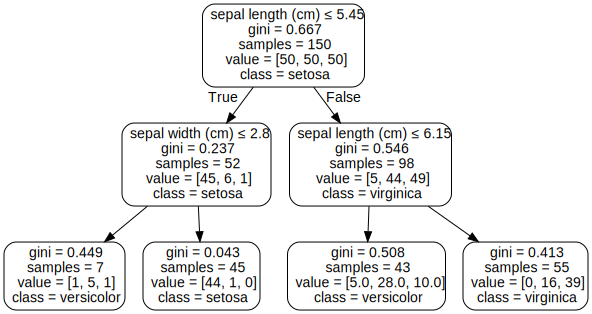

In [5]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(model, 
                                out_file=None, 
                                feature_names=iris.feature_names[:2],  
                                class_names=iris.target_names,  
                                filled=False, 
                                rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render(filename="iris_tree")
graph